# German Credit Data Analysis

The task is execuded as per the CRISP-DM (Cross industry standard process for Data mining) methodoloy.

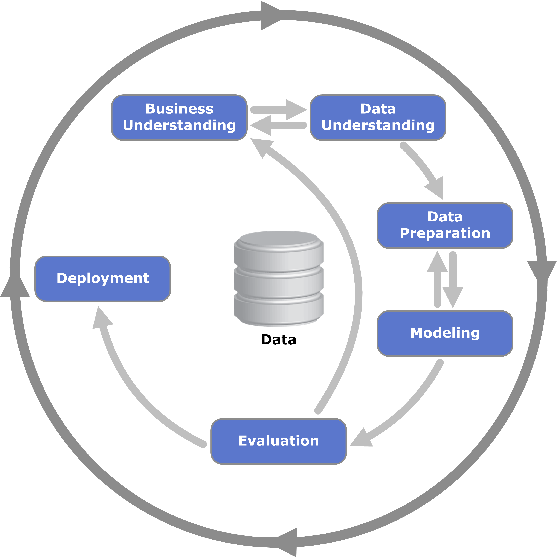

The different stages of the cycle are mensioned below.

##### Business Understanding : 
    
    To classify the customers as potential loan defaulter.
        
##### Data Understanding:
    
    - 3 Continuous features
    
        -Age
        -Amount
        -Loan Duration
     
     -13 Categorical features
     
        -checking_balance (ordinal)
        -credit_history (ordinal)
        -purpose
        -savings_balance (ordinal)
        -employment_duration (ordinal)
        -percent_of_income
        -years_at_residence
        -other_credit
        -housing
        -existing_loans_count
        -job - (ordinal)
        -dependents 
        -phone 
        
    -Target variable
    
        -Default (Binary)
    
##### Data preparation: 
    
    -Label encoding
    -One hot encoding
    -Oversampling (SMOTE)
    -Feature selction
    
##### Modelling :
    
    -Decision Tree
    -Logistic Regression
    -Random Forest
     
##### Evaluation:
    
    -Misclassification Cost
    -Recall
    -ROC AUC
    
The notebook is divided into following sections 

1. Data cleaning
2. Exploratory data analysis
3. Data Pre processing
4. Feature selection
5. Modelling & Evaluation
6. Result

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1. Data Cleaning

In [239]:
#Reading the data
df = pd.read_csv('credit.csv')
df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


### 1.1 Target class imbalanced

Total number of defaulters in the dataset is only 30%. Need to takle this before modelling.

In [240]:
df.default.value_counts()

no     700
yes    300
Name: default, dtype: int64

### 1.2 Type casting and encoding

In [241]:
# Label encoding the target class
df.default = df.default.apply(lambda x: 0 if x=='no' else 1)

# Converting certain colummns as categorical as pandas reads them as integer
df.dependents = df.dependents.apply(lambda x: str(x))
df.percent_of_income = df.percent_of_income.apply(lambda x: str(x))
df.years_at_residence = df.years_at_residence.apply(lambda x: str(x))
df.existing_loans_count = df.existing_loans_count.apply(lambda x: str(x))

### 1.2 No misssing data

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   object
 8   years_at_residence    1000 non-null   object
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   object
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   object
 15  phone                 1000 non-null   o

### 2.Exploratory Data Analysis

### 2.1 Continuous features
Summary statistics for continuous variables

In [243]:
df.describe()

,months_loan_duration,amount,age,default
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000,0.300000
std,12.058814,2822.736876,11.375469,0.458487
min,4.000000,250.000000,19.000000,0.000000
25%,12.000000,1365.500000,27.000000,0.000000
50%,18.000000,2319.500000,33.000000,0.000000
75%,24.000000,3972.250000,42.000000,1.000000
max,72.000000,18424.000000,75.000000,1.000000


Distribution of continuous variables

###### 2.1.1 Histogram

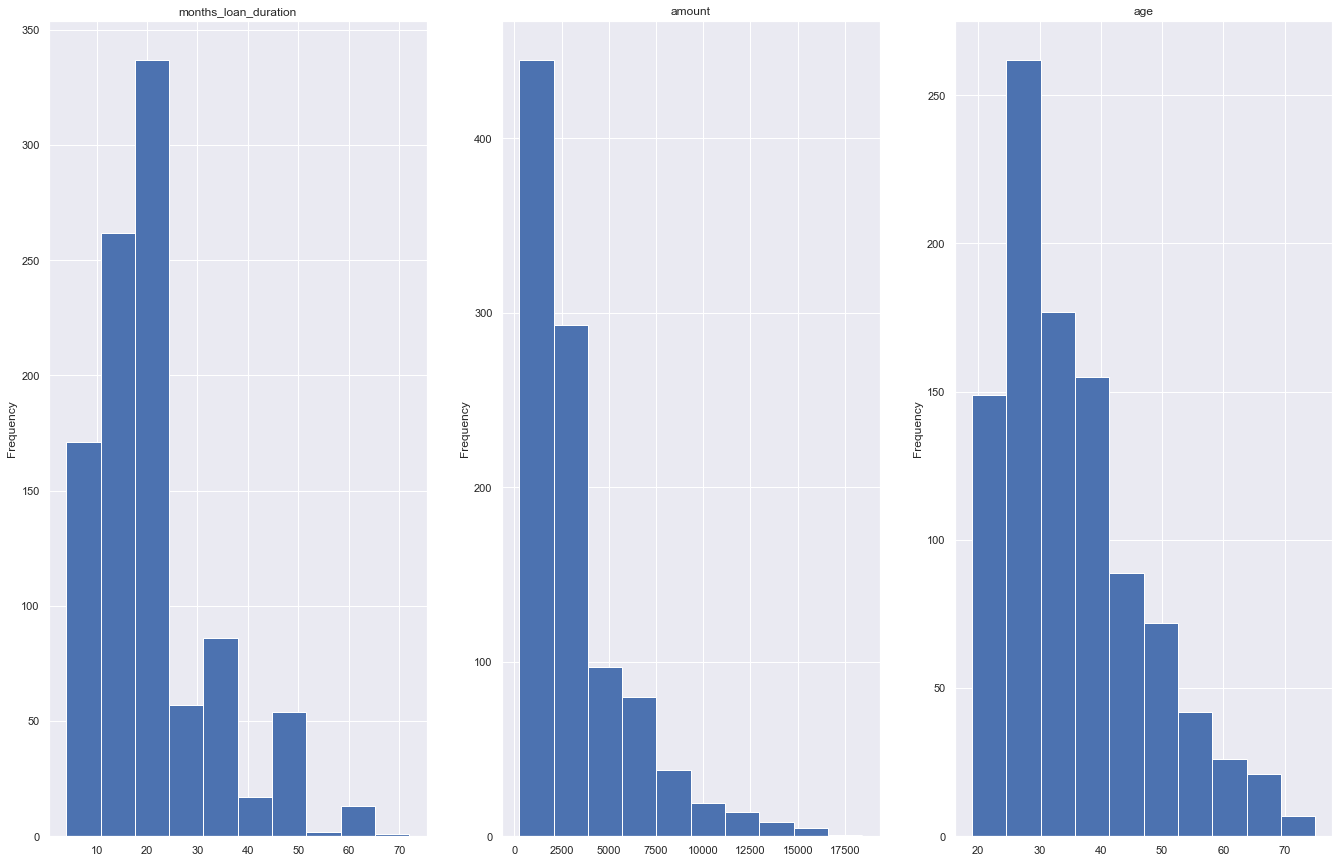

In [244]:
fig, axs = plt.subplots(1,3,figsize=(23,15))

df.months_loan_duration.plot.hist(ax=axs[0],title='months_loan_duration')
df.amount.plot.hist(ax=axs[1],title = 'amount')
df.age.plot.hist(ax=axs[2],title='age')

###### 2.1.2 Boxplot

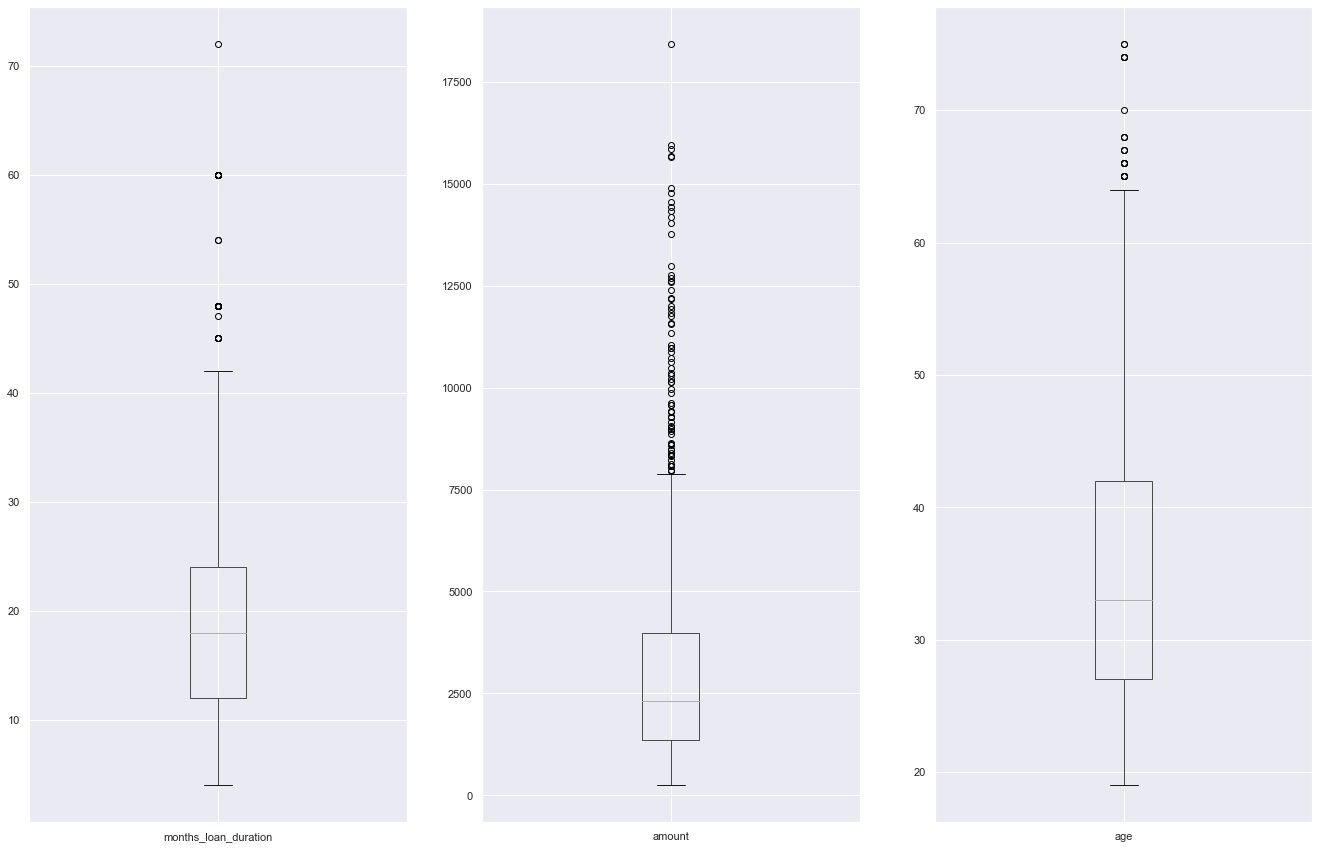

In [245]:
fig, axs = plt.subplots(1,3,figsize=(23,15))

df.boxplot(column='months_loan_duration',ax=axs[0])

df.boxplot(column='amount',ax=axs[1])
df.boxplot(column='age',ax=axs[2])

##### 2.1.3 Correlation between the features 

In [9]:
corr_matrix = df[['months_loan_duration','age','amount']].corr() # neglecting sample_id column as its not needed
corr_matrix[(corr_matrix < -0.4) | (corr_matrix > 0.4) ]


,months_loan_duration,age,amount
months_loan_duration,1.000000,NaN,0.624984
age,NaN,1.0,NaN
amount,0.624984,NaN,1.000000


#### 2.1.4 Inference

    -All the continuous features are positively skewed with extreme value towards the right.
    
    -Highest correlation is between Age and Amount with positive pearson coefficient 0.62.
    
    -Capping or trimming the outlier may not be suitable for this problem as approximating the information may prove costly  or risky as we are dealing with imbalanced classification.

### 2.2 Categorical variable 

#### 2.2.1 Stacked Bar chart based on the contigency table

Disabling auto scrolling 

In [256]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

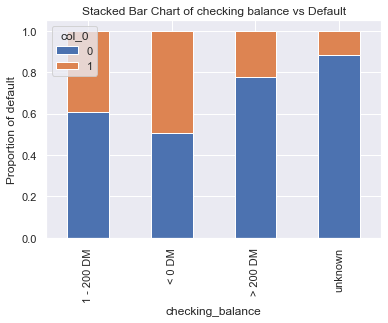

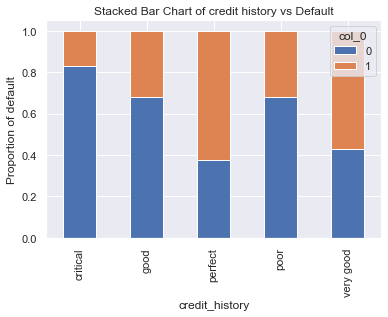

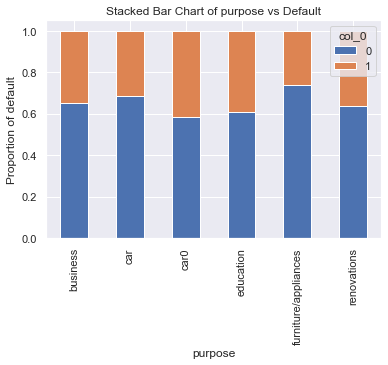

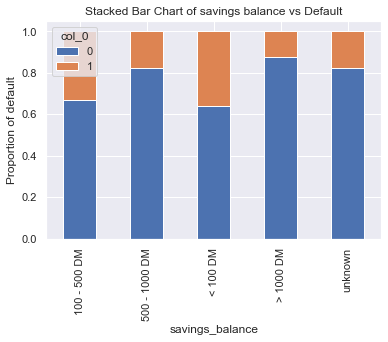

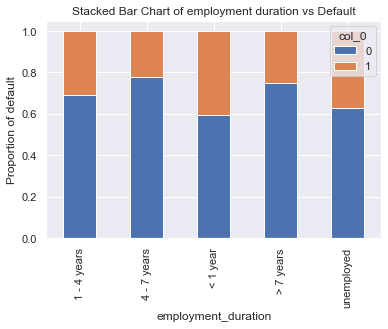

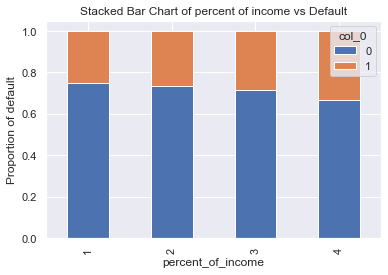

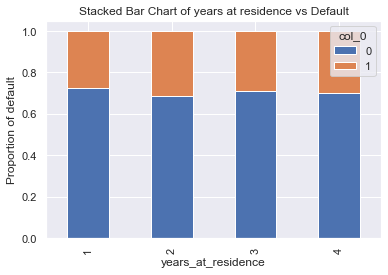

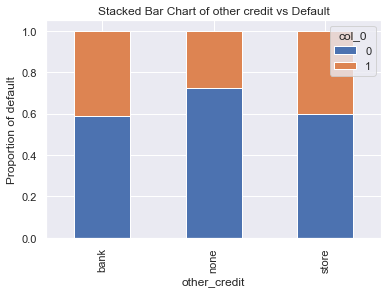

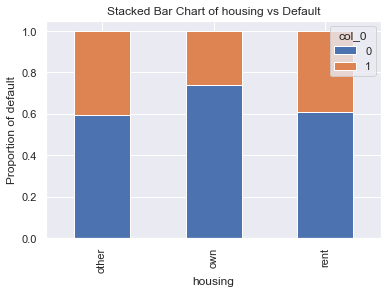

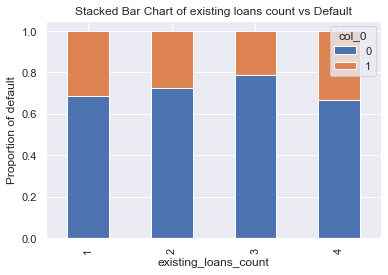

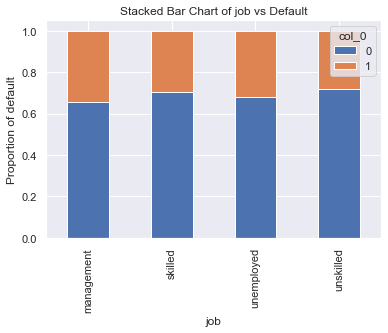

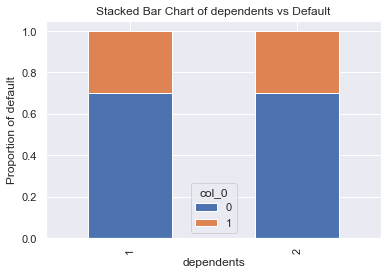

In [257]:
for column in df.select_dtypes(exclude=['int64', 'float']).columns[:-1]: #columns that are not of numeric type
    pd.crosstab(df[column].values,df.default.values,normalize='index').plot(kind='bar',stacked=True)
    plt.title('Stacked Bar Chart of '+column.replace('_',' ')+' vs Default')
    plt.xlabel(column)
    plt.ylabel('Proportion of default')

#### 2.2.2 Chi Square test

NUll hypothesis : The two categories are independent or no association

Alternate Hypothesis : The two categories are dependent or has association

In [260]:
from scipy.stats import chi2_contingency

chi_sq_test = {}
for column in df.select_dtypes(exclude=['int64', 'float']).columns: # columns that are not of numeric type
    target_job_title_cross_tab = pd.crosstab(df.default.values,df[column].values).values
    result = chi2_contingency(target_job_title_cross_tab)[:2]
    chi_sq_test[column] = result[1]

chi_sq_test = dict(sorted(chi_sq_test.items(),key=lambda x :x[1],reverse = True))

# Creating a dataframe
chi_sq_df = pd.DataFrame(chi_sq_test.values(),index = chi_sq_test.keys(),columns=['Pvalue'])

# Setting significance at 0.05 
chi_sq_df['Significance(0.05)'] = chi_sq_df.Pvalue.apply(lambda x: 'yes' if x <0.05 else 'no' )
chi_sq_df

,Pvalue,Significance(0.05)
dependents,1.000000e+00,no
years_at_residence,8.615521e-01,no
job,5.965816e-01,no
existing_loans_count,4.451441e-01,no
phone,2.788762e-01,no
purpose,1.448888e-01,no
percent_of_income,1.400333e-01,no
other_credit,1.629318e-03,yes
employment_duration,1.045452e-03,yes
housing,1.116747e-04,yes


#### 2.2.3 Inference

    -Features that are significant can be read fron chi square summary table.
    
    -The same can be inferred from  stacked bar chart where the defaulter proportion varies significantly for any one of the group in that category.
    
    -It is to be noted that these results are independent for the feature and does not consider interaction effect.

### 3. Data Pre-processing

#### 3.1 Label encoding

    -Ordinal categories are label encoded.
    
    -Order of the factors are determined from the data description 
    
    -https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [261]:
checking_balance_label= {'unknown' : 0,
'< 0 DM' :1,
'1 - 200 DM':2,
'> 200 DM':3}

savings_balance_label={'unknown':0,
'< 100 DM':1,
'100 - 500 DM':2,
'500 - 1000 DM':3,
'> 1000 DM':4}

employment_duration_label = {'unemployed':0,
'< 1 year':1,
'1 - 4 years':2,
'4 - 7 years':3,
'> 7 years':4}
 
job_label={'unemployed' : 0,
'unskilled':1,
'skilled':2,
'management':3
}

credit_history_label ={'critical':0,
'poor':1,
'good':2,
'very good':3,
'perfect':4}

# Label are generated based on the dictionary mapping

df.checking_balance = df.checking_balance.apply(lambda x: checking_balance_label[x])
df.savings_balance = df.savings_balance.apply(lambda x: savings_balance_label[x])
df.employment_duration = df.employment_duration.apply(lambda x: employment_duration_label[x])
df.job = df.job.apply(lambda x: job_label[x])
df.phone = df.phone.apply(lambda x: 0 if x =='no' else 1)
df.credit_history = df.credit_history.apply(lambda x: credit_history_label[x])

df


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,furniture/appliances,1169,0,4,4,4,67,none,own,2,2,1,1,0
1,2,48,2,furniture/appliances,5951,1,2,2,2,22,none,own,1,2,1,0,1
2,0,12,0,education,2096,1,3,2,3,49,none,own,1,1,2,0,0
3,1,42,2,furniture/appliances,7882,1,3,2,4,45,none,other,1,2,2,0,0
4,1,24,1,car,4870,1,2,3,4,53,none,other,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,furniture/appliances,1736,1,3,3,4,31,none,own,1,1,1,0,0
996,1,30,2,car,3857,1,2,4,4,40,none,own,1,3,1,1,0
997,0,12,2,furniture/appliances,804,1,4,4,4,38,none,own,1,2,1,0,0
998,1,45,2,furniture/appliances,1845,1,2,4,4,23,none,other,1,2,1,1,1


#### 3.2 One-hot vector encoding

    -Nominal categories are encoded using one hot vector method.
    -One of the vector is dropped for each category to avoid multicollinearity.

In [39]:
model_data = pd.get_dummies(df,drop_first=True) #one hot vector
y = model_data.default
x = model_data.copy()
del x['default']
x

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,years_at_residence,age,existing_loans_count,job,...,purpose_furniture/appliances,purpose_renovations,percent_of_income_2,percent_of_income_3,percent_of_income_4,other_credit_none,other_credit_store,housing_own,housing_rent,dependents_2
0,1,6,0,1169,0,4,4,67,2,2,...,1,0,0,0,1,1,0,1,0,0
1,2,48,2,5951,1,2,2,22,1,2,...,1,0,1,0,0,1,0,1,0,0
2,0,12,0,2096,1,3,3,49,1,1,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,7882,1,3,4,45,1,2,...,1,0,1,0,0,1,0,0,0,1
4,1,24,1,4870,1,2,4,53,2,2,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,1736,1,3,4,31,1,1,...,1,0,0,1,0,1,0,1,0,0
996,1,30,2,3857,1,2,4,40,1,3,...,0,0,0,0,1,1,0,1,0,0
997,0,12,2,804,1,4,4,38,1,2,...,1,0,0,0,1,1,0,1,0,0
998,1,45,2,1845,1,2,4,23,1,2,...,1,0,0,0,1,1,0,0,0,0


#### 3.3 Train & Test Split - [70:30]

In [331]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#### 3.4 SMOTE 

    -Synthetic Minority Oversampling Technique.
    -Minority class is upsampled to balance the classes.
    -Uses KNN to generate synthetic samples to increase minority class count.

In [332]:
from imblearn.over_sampling import SMOTE

def upsample_SMOTE(x_train, y_train, ratio=1.):
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)
    return X_train_sm, y_train_sm

x_train, y_train = upsample_SMOTE(x_train, y_train)
y_train.value_counts()

1    486
0    486
Name: default, dtype: int64

### 4.Feature selection

#### 4.1 Recursive Feature elimination using Random Forest 

    -Top 10 features are selected based on mean decrease in gini using recursive feature elimination method.

Insignificant Features based Recursive elimination using random forest

Index(['existing_loans_count', 'phone', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'percent_of_income_2', 'percent_of_income_3',
       'percent_of_income_4', 'other_credit_none', 'other_credit_store',
       'housing_rent', 'dependents_2'],
      dtype='object')

Feature importance score


Text(0.5, 1.0, 'Feature impotance score')

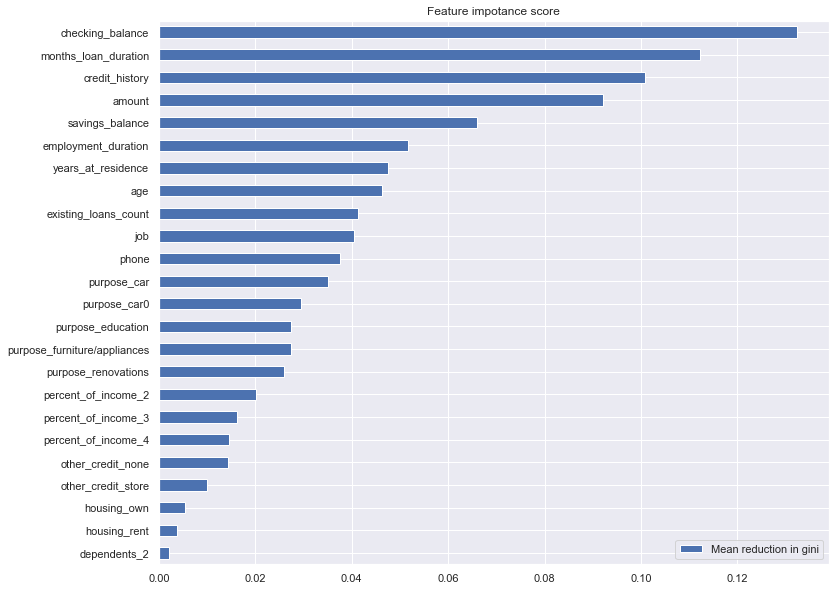

In [333]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rfe = RFE(rf,10) # Top 10 features are selected after inspecting different values
rfe = rfe.fit(x_train, y_train)


rf.fit(x_train, y_train)
importance = rf.feature_importances_

# Importance score is recorded
imp_dict = dict(zip(x.columns[::-1],importance))
importance_test = dict(sorted(imp_dict.items(),key=lambda x :x[1],reverse = False))
importance_df = pd.DataFrame(importance_test.values(),index = imp_dict.keys(),columns=['Mean reduction in gini'])

print('\nFeature importance score')
importance_df.plot(kind='barh',figsize=(12,10))
plt.title('Feature impotance score')

Subsetting the important features

In [311]:
x_train = x_train[x_train.columns[rfe.support_]]
x_test = x_test[x_test.columns[rfe.support_]]

#### 4.2 Inference

Features discarded are mentioned below

- Purpose
- Other credits 
- Percent of income
- Dependents
- Phone 

Excep 'Other Credits' We can confirm that all the other features are labelled insignificant in the Chi Square test. 
Though 'other credits' is significant its not having any interaction with other variables

### 5. Modelling and Evaluation

In [312]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

# Function to fit the model, perform CV and testing
def perform_cv_and_testing(classifier,x_train,y_train,x_test,y_test):
    classifier.fit(x_train, y_train)
    auc = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10,scoring='roc_auc')
    
    print('------------------------------------------------------')
    print('\nk-fold CV Mean ROC AUC {}\n'.format(auc.mean()))
    print('------------------------------------------------------\n')
    
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print('Confusion Matrix')
    print(cm)
    
    print('------------------------------------------------------\n')
    print('Classificaion Report\n\n')
    print(classification_report(y_test, y_pred, target_names=['Not Default','Default']))
    cost = np.array([[0,1],[5,0]])
    print('------------------------------------------------------\n')
    
    print('Missclasification cost {}'.format(np.sum(cm*cost)))
    print('\n------------------------------------------------------\n')
    
    y_pred_proba = classifier.predict_proba(x_test)[::,1]
    fpr, tpr,thesholds = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.xlabel('False Positive rate ( 1 - specificity)')
    plt.ylabel('True Positive rate (Sensitivity)')
    plt.show()

#### 5.1 Decision Tree

    -Parameters are tweaked after grid search.

------------------------------------------------------

k-fold CV Mean ROC AUC 0.7795133104262112

------------------------------------------------------

Confusion Matrix
[[155  59]
 [ 40  46]]
------------------------------------------------------

Classificaion Report


              precision    recall  f1-score   support

 Not Default       0.79      0.72      0.76       214
     Default       0.44      0.53      0.48        86

    accuracy                           0.67       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.69      0.67      0.68       300

------------------------------------------------------

Missclasification cost 259

------------------------------------------------------



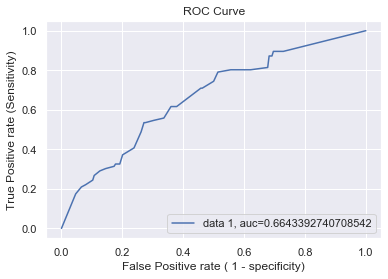

In [313]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,max_depth=10,min_samples_leaf=10)
perform_cv_and_testing(classifier,x_train,y_train,x_test,y_test)

#### 5.2 Random Forrest

    -Parameters are tweaked after grid search

------------------------------------------------------

k-fold CV Mean ROC AUC 0.8201708489518257

------------------------------------------------------

Confusion Matrix
[[144  70]
 [ 21  65]]
------------------------------------------------------

Classificaion Report


              precision    recall  f1-score   support

 Not Default       0.87      0.67      0.76       214
     Default       0.48      0.76      0.59        86

    accuracy                           0.70       300
   macro avg       0.68      0.71      0.67       300
weighted avg       0.76      0.70      0.71       300

------------------------------------------------------

Missclasification cost 175

------------------------------------------------------



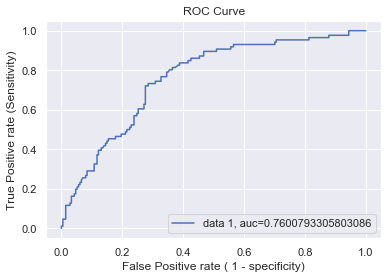

In [329]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 15, criterion = 'entropy',random_state = 100,max_depth=5,min_samples_split=12)
perform_cv_and_testing(classifier_rf,x_train,y_train,x_test,y_test)

#### 5.3 Logistic Regression

    -Feature scaling is required for logistic regression.[Range normalisation scales features in the range (0-1)]
    
    -Due to normalisation replicating SMOTE and Feature filtering techniques as conducted earlier.
    

Optimization terminated successfully.
         Current function value: 0.614257
         Iterations 5
------------------------------------------------------

k-fold CV Mean ROC AUC 0.7167447591281412

------------------------------------------------------

Confusion Matrix
[[145  69]
 [ 19  67]]
------------------------------------------------------

Classificaion Report


              precision    recall  f1-score   support

 Not Default       0.88      0.68      0.77       214
     Default       0.49      0.78      0.60        86

    accuracy                           0.71       300
   macro avg       0.69      0.73      0.69       300
weighted avg       0.77      0.71      0.72       300

------------------------------------------------------

Missclasification cost 164

------------------------------------------------------



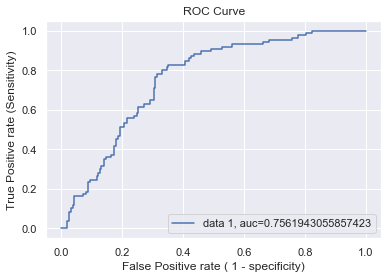

In [354]:
# Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

# Repeating Smote and feature selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train, y_train = upsample_SMOTE(x_train, y_train)
x_train = x_train[x_train.columns[rfe.support_]]
x_test = x_test[x_test.columns[rfe.support_]]
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()

#Logistic regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
perform_cv_and_testing(logisticRegr,x_train,y_train,x_test,y_test)

#### 5.4 Inference

- Logistic Regression is picked as the best performing model for the given data and the given feature subset.

- Logistic Regression has the least Misclassification cost (165) and high recall for default class(78%).

- Also ROC AUC is 76% and model is able to handle True positive and False positive rate optimally with low cost.

### 6.Result

From the logistic regression summary we can interpret the relationship between the target and independent features.


In [349]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.114     
Dependent Variable:  default           AIC:               1214.1155 
Date:                2020-07-19 15:18  BIC:               1262.9091 
No. Observations:    972               Log-Likelihood:    -597.06   
Df Model:            9                 LL-Null:           -673.74   
Df Residuals:        962               LLR p-value:       1.7722e-28
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
checking_balance      1.0226   0.2335  4.3800 0.0000  0.5650  1.4802
months_loan_duration  2.2063   0.5177  4.2619 0.0000  1.1917  3.2210
credit_history        1.3201   0.2592  5.0934 0.0000  0.8121  1.8280
amount                0.4961   0.5715  0.8680 0.3854 -0.6240  1.6161
savings_balance      -0.2374   0.3063 -0.7753 0.4382 -0.8377  0.3628
employment_duration  -1.0503   0.2607 -4.0287 0.0001 -1.5613 -0.5394
years_at_residence   -0.0756   0.2139 -0.3535 0.7237 -0.4948  0.3436
age                  -0.7855   0.3769 -2.0843 0.0371 -1.5241 -0.0469
job                  -0.2169   0.3105 -0.6987 0.4847 -0.8254  0.3915
housing_own          -0.5596   0.1528 -3.6615 0.0003 -0.8592 -0.2601
====================================================================

"""

From the significant coefficients we can infer the direction of relationship. 

    -As we change checking balance,loan duration and credit history by one unit the odds of becoming a defaulter increases.
    
    -While odds of becoming defaulter decreases as we employment duration and age increases.